## Evaluation Harness for Visualizaiton Generation Pipelines 

The goal is to implement a harness that can take a list of datasets and compute a set of evaluation metrics 

- Visualization error rate 
- Self Evaluated Visualization Quality 



In [1]:
import pandas as pd 
import numpy as np 
import os 
from tqdm import tqdm
from lida import Manager, TextGenerationConfig , llm  
from dataclasses import asdict

In [2]:
def get_data():
    exclude = ["annual-precip.json"]
    datasets_list = os.listdir('data/vega')
    datasets_list = [dataset for dataset in datasets_list if dataset not in exclude]
    print(len(datasets_list), "datasets found")
    return datasets_list
datasets_list = get_data()    

68 datasets found


In [3]:
text_generator = llm("openai")

text_gen_configs= [
    TextGenerationConfig(n=1, temperature=0.2, model="gpt-3.5-turbo-0301", use_cache=True),
    TextGenerationConfig(n=1, temperature=0.2, model="gpt-4-0314", use_cache=True),
]

summary_methods = ["default","llm","columns"]

lida = Manager(text_gen=text_generator)

visualizations = []
for textgen_config in text_gen_configs:
    for dataset_item in tqdm(datasets_list[0:20]):
        print("Processing dataset: ", dataset_item )
        dataset_item = os.path.join('data/vega', dataset_item)  
        for summary_method in summary_methods:
             
            summary = lida.summarize(dataset_item, summary_method=summary_method, textgen_config=textgen_config)  
            goals = lida.goals(summary, n=5, textgen_config=textgen_config)  
            library = "seaborn"
            for goal in tqdm(goals) :
                charts = lida.visualize(summary=summary, goal=goal, textgen_config=textgen_config, library=library, return_error=True)
                chart = asdict(charts[0]) 
                chart.update({"goal": asdict(goal), "library": library, "dataset": dataset_item, "summary_method": summary_method, "model": textgen_config.model}) 
                visualizations.append(chart)
             
 

  0%|          | 0/20 [00:00<?, ?it/s]

Processing dataset:  co2-concentration.csv


<string>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  5%|▌         | 1/20 [00:04<01:26,  4.57s/it]

Processing dataset:  wheat.json


 10%|█         | 2/20 [00:07<01:04,  3.60s/it]

Processing dataset:  la-riots.csv


 15%|█▌        | 3/20 [00:09<00:47,  2.78s/it]

Processing dataset:  flights-3m.csv


<string>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

 20%|██        | 4/20 [00:17<01:16,  4.81s/it]

Processing dataset:  birdstrikes.csv


100%|██████████| 5/5 [00:01<00:00,  3.74it/s]
/home/victordibia/miniconda3/envs/coral/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/victordibia/miniconda3/envs/coral/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
 25%|██▌       | 5/20 [00:22<01:14,  4.96s/it]

Processing dataset:  income.json


100%|██████████| 5/5 [00:01<00:00,  4.95it/s]
<string>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

 30%|███       | 6/20 [00:24<00:55,  3.99s/it]

Processing dataset:  stocks.csv


100%|██████████| 5/5 [00:02<00:00,  1.81it/s]
<string>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

100%|██████████| 5/5 [00:01<00:00,  4.47it/s]
<string>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

 35%|███▌      | 7/20 [00:30<01:00,  4.66s/it]

Processing dataset:  movies.json


 40%|████      | 8/20 [00:33<00:50,  4.21s/it]

Processing dataset:  penguins.json


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
100%|██████████| 5/5 [00:03<00:00,  1.47it/s]
<string>:13: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
<string>:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 45%|████▌     | 9/20 [00:39<00:50,  4.61s/it]

Processing dataset:  flare-dependencies.json


 50%|█████     | 10/20 [01:38<03:35, 21.56s/it]

Processing dataset:  population.json


 50%|█████     | 10/20 [12:18<12:18, 73.89s/it]


Timeout: Request timed out: HTTPSConnectionPool(host='api.openai.com', port=443): Read timed out. (read timeout=600)

In [ ]:
vdf = pd.DataFrame(visualizations) 
print(vdf.shape)
vdf.head()

(300, 10)


,spec,status,raster,code,library,error,goal,dataset,summary_method,model
0,None,True,iVBORw0KGgoAAAANSUhEUgAABLAAAAJYCAYAAABy5h8aAA...,import seaborn as sns\nimport pandas as pd\nim...,seaborn,None,{'question': 'What is the trend in CO2 concent...,data/vega/co2-concentration.csv,default,gpt-3.5-turbo-0301
1,None,True,iVBORw0KGgoAAAANSUhEUgAABJIAAAM7CAYAAAARWbq3AA...,import seaborn as sns\nimport pandas as pd\nim...,seaborn,None,{'question': 'What is the relationship between...,data/vega/co2-concentration.csv,default,gpt-3.5-turbo-0301
2,None,True,iVBORw0KGgoAAAANSUhEUgAABJIAAAM7CAYAAAARWbq3AA...,import seaborn as sns\nimport pandas as pd\nim...,seaborn,None,{'question': 'What is the distribution of CO2 ...,data/vega/co2-concentration.csv,default,gpt-3.5-turbo-0301
3,None,True,iVBORw0KGgoAAAANSUhEUgAABJIAAAM7CAYAAAARWbq3AA...,import seaborn as sns\nimport pandas as pd\nim...,seaborn,None,{'question': 'What is the average CO2 concentr...,data/vega/co2-concentration.csv,default,gpt-3.5-turbo-0301
4,None,False,None,import seaborn as sns\nimport pandas as pd\nim...,seaborn,"{'message': '""['latitude'] not in index""', 'tr...",{'question': 'What is the relationship between...,data/vega/co2-concentration.csv,default,gpt-3.5-turbo-0301


                model summary_method  error_rate
0  gpt-3.5-turbo-0301        columns         4.0
1  gpt-3.5-turbo-0301        default        12.0
2  gpt-3.5-turbo-0301            llm         8.0
3          gpt-4-0314        columns         2.0
4          gpt-4-0314        default         2.0
5          gpt-4-0314            llm         0.0


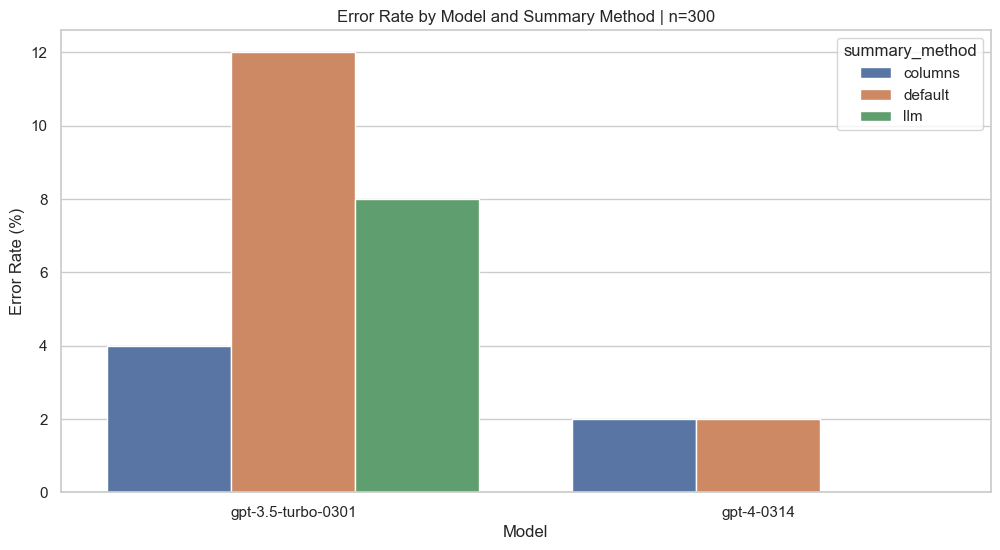

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot_error_rate(data: pd.DataFrame):
    # Calculate error rate
    data['error_rate'] = data['status'].apply(lambda x: 0 if x else 1)
    
    # Group by model and summary_method, then calculate the mean error_rate (percentage)
    error_rate_data = data.groupby(['model', 'summary_method'])['error_rate'].mean().reset_index()
    error_rate_data['error_rate'] = error_rate_data['error_rate'] * 100
    
    print(error_rate_data)
    # Create a stacked bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(x='model', y='error_rate', hue='summary_method', data=error_rate_data, errorbar=None)
    
    num_viz =   # number of visualizations per bar (model, summary method)
    # Add labels and title
    plt.xlabel('Model')
    plt.ylabel('Error Rate (%)')
    plt.title(f'Error Rate by Model and Summary Method | n={str(num_viz)}')
    
    return plt

# Assuming the data is in a pandas DataFrame called 'df'
chart = plot_error_rate(vdf)
chart.show()

## Metrics 

- Visualization Error Rate VER
- Self Evaluation Visualization Quality SEVQ

## Methods 

- Generate visualization 
- Visualize error rates 
- Compute SEVQ 